In [4]:
import pandas as pd
from numpy import mean


data = pd.read_excel("/Users/thedarkknight/Downloads/dataset.xlsx", sheet_name=['Companies', 'Rounds', 'Investments', 'Acquisitions','Additions'])


In [140]:
import matplotlib.pyplot as plt

In [96]:
companies = data["Companies"]
rounds = data["Rounds"]
investments = data["Investments"]
acquisitions = data["Acquisitions"]
additions = data["Additions"]
print(data.keys())

odict_keys(['Companies', 'Rounds', 'Investments', 'Acquisitions', 'Additions'])


In [161]:
companies.head()
# companies.info()
# type_ = rounds.funding_round_type
# companies.describe(include = 'all')
region = companies.region
city = companies.city
print("region length",len(region.unique()))
print("city length",len(city.unique()))
# q = companies.permalink.value_counts()
# filter = companies[companies.permalink.isin(e)]
# companies_ = companies.dropna(axis=0)
# companies_.shape

region length 1090
city length 4189


In [80]:
print("shape is ", companies.shape)
print(companies.columns)

shape is  (49438, 18)
Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at'],
      dtype='object')


In [94]:
drop_companies = ['permalink','homepage_url','state_code','founded_at', 'founded_month','founded_quarter','first_funding_at','last_funding_at']
companies_drop = companies.drop(columns=drop_companies,axis=1) 
companies_drop.head()

,name,category_list,market,funding_total_usd,status,country_code,region,city,funding_rounds,founded_year
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,New York City,New York,1,2012.0
1,&TV Communications,|Games|,Games,4000000,operating,USA,Los Angeles,Los Angeles,2,NaN
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000,operating,EST,Tallinn,Tallinn,1,2012.0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,London,London,1,2011.0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,Dallas,Fort Worth,2,2014.0


In [167]:
companies_market = companies_drop.dropna(subset=['market'],axis=0)
funding_by_market = companies_market.groupby("market").funding_total_usd.sum()/1e9
funding_top20 = funding_by_market.sort_values(ascending=False)[:20]
# plt.show((1000,1000))
# funding_top20.plot.bar()
# plt.show((1000,1000))

In [209]:
companies_market = companies_drop.dropna(subset=['market'],axis=0)
funding_by_market_mean = companies_market.groupby("market").mean()
funding_top20 = funding_by_market_mean.funding_total_usd.sort_values(ascending=False)[:20]
# plt.show((1000,1000))
# funding_top20.plot.bar()
# plt.show((1000,1000))

In [210]:
rounds_avg = funding_by_market_mean.sort_values(by=['funding_total_usd'],ascending=False)[:10].funding_rounds
# plt.show((1000,1000))
# rounds_avg.plot.bar()
# plt.show((1000,1000))b


In [ ]:
companies_market = companies_drop.dropna(subset=['market'],axis=0)
funding_by_market = companies_market.groupby("market").funding_total_usd.sum()/1e9
funding_top20 = funding_by_market.sort_values(ascending=False)[:20]
# plt.show((1000,1000))
# funding_top20.plot.bar()
# plt.show((1000,1000))

In [170]:
companies_country = companies_drop.dropna(subset=['country_code'],axis=0)
funding_by_country = companies_country.groupby("country_code").funding_total_usd.sum()/1e8
funding_top10 = funding_by_country.sort_values(ascending=False)[:10]
# plt.show((1000,1000))
# funding_top10.plot.bar()
# plt.show((1000,1000))

In [175]:
companies_region = companies_drop.dropna(subset=['region'],axis=0)
funding_by_region = companies_region.groupby("region").funding_total_usd.sum()/1e9
funding_top20 = funding_by_region.sort_values(ascending=False)[:10]
# plt.show((1000,1000))
# funding_top20.plot.bar()

In [215]:
companies_status = companies_drop.dropna(subset=['status'],axis=0)
funding_by_status = companies_status.groupby("status").funding_total_usd.sum()/1e9
funding_top20 = funding_by_status.sort_values(ascending=False)
# plt.show((1000,1000))
# funding_top20.plot.bar()b

In [233]:
closed = companies_drop[companies_drop.status=='closed']
funding_by_closed = closed.groupby("market").count()
counts = funding_by_closed.funding_total_usd.sort_values(ascending=False)[:20]
# funding_top20 = funding_by_closed.funding_total_usd.sort_values(ascending=False)[:20]
# plt.show((1000,1000))
# counts.plot.bar()


In [189]:
# companies_market.market.unique()
# companies_market2 = companies_drop.dropna(subset=['market'],axis=0)
count_by_market = companies_market.groupby("market").funding_rounds.count()
count_top15 = count_by_market.sort_values(ascending=False)[:15]
# plt.show((1000,1000))
# count_top15.plot.bar()

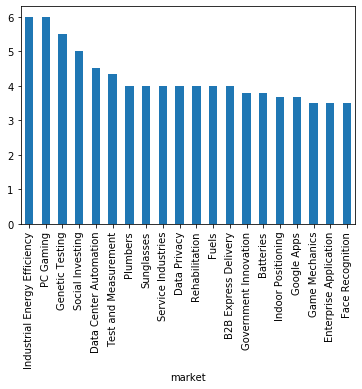

In [178]:
companies_funding_rounds = companies_drop.dropna(subset=['funding_rounds'],axis=0)

funding_by_funding_rounds = companies_funding_rounds.groupby("market").funding_rounds.mean()
funding_top10 = funding_by_funding_rounds.sort_values(ascending=False)[:20]
plt.show((1000,1000))
funding_top10.plot.bar()


In [251]:
rounds_type_year = rounds.dropna(subset=["funded_year","funding_round_type"],axis=0)
rounds_type_year
funding_by_type_year = rounds_type_year.groupby(["funded_year","funding_round_type"]).mean()/1e8
funding_top20 = funding_by_type_year.raised_amount_usd.sort_values(ascending=False)[:20]
funding_top20
# plt.show((1000,1000))
# funding_top20.plot.bar()

funded_year  funding_round_type
2009.0       post_ipo_equity       6.355856
             post_ipo_debt         5.239375
2005.0       post_ipo_equity       5.011250
2008.0       post_ipo_equity       4.746714
2010.0       post_ipo_debt         3.000000
2014.0       post_ipo_debt         2.721963
2011.0       secondary_market      2.062500
2010.0       secondary_market      1.497311
2008.0       private_equity        1.351512
2005.0       private_equity        1.326425
2007.0       private_equity        1.147511
2012.0       post_ipo_equity       1.131340
2013.0       post_ipo_debt         1.104000
2014.0       private_equity        1.008655
2010.0       private_equity        0.782639
2009.0       private_equity        0.778711
2002.0       debt_financing        0.703333
2006.0       private_equity        0.694340
             debt_financing        0.668403
2013.0       post_ipo_equity       0.654717
Name: raised_amount_usd, dtype: float64

In [288]:
rounds_year = rounds.dropna(subset=["funded_year","raised_amount_usd"],axis=0)
funding_by_year = rounds_year.groupby("funded_year").raised_amount_usd.sum()/1e9
# funding_by_year.iloc[:-10]
# funding_top20 = funding_by_year.sort_values(ascending=False)[:20]
# funding_top20
# plt.show((1000,1000))
# funding_by_year.plot.bar()

In [289]:
rounds_type = rounds.dropna(subset=["funding_round_type","raised_amount_usd"],axis=0)
funding_by_type = rounds_type.groupby("funding_round_type").raised_amount_usd.sum()/1e9
# funding_by_year.iloc[:-10]
# funding_top20 = funding_by_year.sort_values(ascending=False)[:20]
# funding_top20
# plt.show((1000,1000))
# funding_by_type.plot.bar()

In [303]:
rounds_type = rounds.dropna(subset=["funding_round_type","raised_amount_usd"],axis=0)
funding_by_type = rounds_type.groupby("funding_round_type").raised_amount_usd.mean()/1e6
# funding_by_type
funding_top20 = funding_by_type.sort_values(ascending=False)
# funding_top20
plt.show((1000,1000))
# funding_top20.plot.bar()

In [305]:
rounds_type = rounds.dropna(subset=["funding_round_type","raised_amount_usd"],axis=0)
funding_by_type = rounds_type.groupby("funding_round_type").raised_amount_usd.count()
# funding_by_type
funding_top20 = funding_by_type.sort_values(ascending=False)
# funding_top20
# plt.show((1000,1000))
# funding_top20.plot.bar()

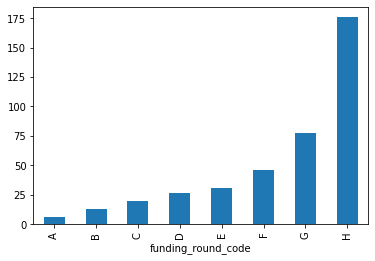

In [319]:
venture = rounds[rounds.funding_round_type=='venture']
funding_by_code = rounds_type.groupby("funding_round_code").mean()/1e6
q = funding_by_code.raised_amount_usd
# plt.show((1000,1000))
q.plot.bar()
# q


In [336]:
categories = investments.dropna(subset=["company_category_list"],axis=0)
cats = categories.company_category_list
uniq = set()
for cat in cats:
    split = cat.split("|")[1:-1]
    for s in split:
        uniq.add(s)
print(len(uniq))

790


In [349]:
investments_cats = investments.dropna(subset=["company_category_list","raised_amount_usd"],axis=0)
diction = dict()
for key in uniq:
    diction[key] = 0
for index,row in investments_cats.iterrows():
    split = row["company_category_list"].split("|")[1:-1]
    for s in split:
        diction[s] += row["raised_amount_usd"]/1e9
        
series = pd.Series(diction)

In [352]:
cats_top20 = series.sort_values(ascending=False)[:20]
plt.show((1000,1000))
# cats_top20.plot.bar()

In [359]:
investor_names = investments.dropna(subset=["investor_name","raised_amount_usd"],axis=0)
all_names = investor_names.investor_name
uniq_investors = all_names.unique()
dict_invest = dict()
for key in uniq_investors:
    dict_invest[key] = 0
for index,row in investor_names.iterrows():
    name = row["investor_name"]
    dict_invest[name] += row["raised_amount_usd"]/1e9

series_invest = pd.Series(dict_invest)

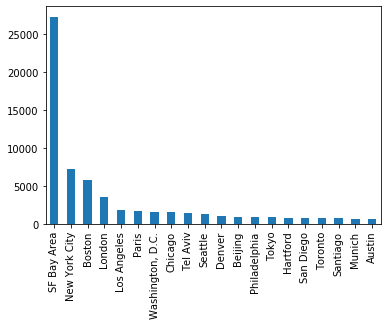

In [444]:
investor_region = investments.dropna(subset=["investor_region"],axis=0)
investor_regions = investor_region.investor_region
top = investor_regions.value_counts()[:20]
plt.show((1000,1000))
top.plot.bar()
# series_invest = pd.Series(dict_invest)

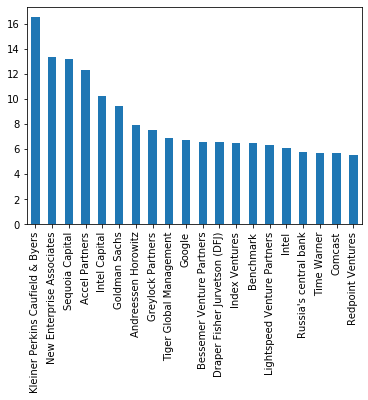

In [361]:
investors_top20 = series_invest.sort_values(ascending=False)[:20]
plt.show((1000,1000))
investors_top20.plot.bar()

In [373]:
top_investors = list(investors_top20.index)

In [371]:
investor_sector = investments.dropna(subset=["investor_name","company_market","raised_amount_usd"],axis=0)
funding_by_investor_sector= investor_sector.groupby(["investor_name","company_market"]).raised_amount_usd.sum()/1e9

funding_top20 = funding_by_investor_sector.sort_values(ascending=False)[:30]
# funding_top20
# plt.show((1000,1000))
# funding_top20.plot.bar()


In [372]:
# list(funding_top20.index)

In [379]:
top_investments = investments[investments.investor_name.isin(top_investors)]
top_investments_market = investments.dropna(subset=["investor_name","company_market","raised_amount_usd"],axis=0)
top_funding_by_investor_sector= top_investments_market.groupby(["company_market"]).raised_amount_usd.sum()/1e9

funding_top20 = top_funding_by_investor_sector.sort_values(ascending=False)[:30]
# funding_top20
# plt.show((1000,1000))
# funding_top20.plot.bar()

In [393]:
investments_type = investments.dropna(subset=["funding_round_type","raised_amount_usd"],axis=0)
funding_type = investments_type.groupby(["funding_round_type"]).mean()/1e8
funding_top20 = funding_type.raised_amount_usd.sort_values(ascending=False)[:20]
# plt.show((1000,1000))
# funding_top20.plot.bar()

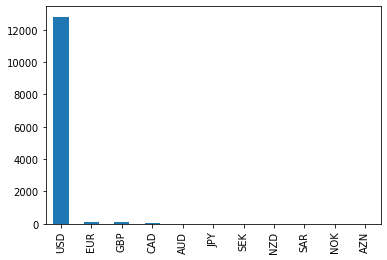

In [410]:
ccy = acquisitions.price_currency_code
ccy.value_counts()
plt.show((1000,1000))
ccy_counts.plot.bar()

In [395]:
acquisitions_markets = acquisitions.dropna(subset=["acquirer_market","company_market"],axis=0)
# acquisitions_markets.map(lambda row: row.acquirer_market +"|" + row.company_market )
# combined = acquisitions_markets["acquirer_market"] +  acquisitions_markets["company_market"]
combined = acquisitions_markets[['acquirer_market', 'company_market']].agg('|'.join, axis=1)
# top20 = combined.value_counts()[:20]
# plt.show((1000,1000))
# top20.plot.bar()

In [418]:
# acquisitions_region = acquisitions.dropna(subset=["company_region","acquirer_region"],axis=0)
# combined = acquisitions_region[['acquirer_region', 'company_region']].agg('|'.join, axis=1)
# combined
top20 = combined.value_counts()[:20]
# plt.show((1000,1000))
# top20.plot.bar()


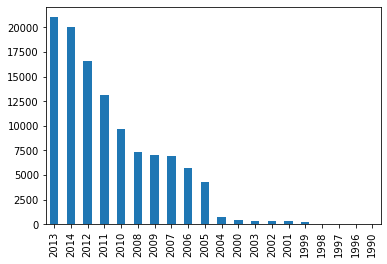

In [429]:
funded_year = investments.dropna(subset=["funded_year"],axis=0)
year = funded_year.funded_year
top20 = year.value_counts().iloc[:20]
plt.show((1000,1000))
top20.plot.bar()

Q1    29662
Q3    29231
Q2    28878
Q4    26735
Name: funded_quarter, dtype: int64


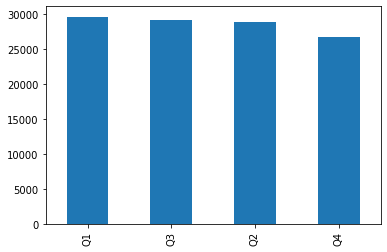

In [428]:
funded_quarter = investments.dropna(subset=["funded_quarter"],axis=0)
quarter = funded_quarter.funded_quarter.map(lambda row: row.split("-")[1])
top20 = quarter.value_counts()
print(top20)
plt.show((1000,1000))
top20.plot.bar()


In [437]:
funded_month = investments.dropna(subset=["funded_month"],axis=0)
month = funded_month.funded_month.map(lambda row: row.split("-")[1])
top20 = month.value_counts()
# print(top20)
# plt.show((1000,1000))
# top20.plot.bar()


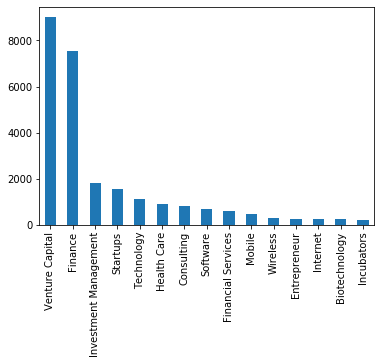

In [441]:
investor_category_list = investments.dropna(subset=["investor_market"],axis=0)
investor_market = investor_category_list.investor_market
top20 = investor_market.value_counts()[:15]
plt.show((1000,1000))
top20.plot.bar()

# categories = investments.dropna(subset=["investor_category_list"],axis=0)
# cats = categories.investor_category_list
# uniq = set()
# for cat in cats:
#     split = cat.split("|")[1:-1]
#     for s in split:
#         uniq.add(s)
# print(len(uniq))
# uniq


In [97]:
raised_amount1 = companies.groupby(["name"]).funding_total_usd.agg(["sum"])
raised_amount2 = rounds.groupby(["company_name"]).raised_amount_usd.agg(["sum"])


In [98]:
raised_amount1

,sum
name,
42,800000
1248,378812
1871,2500000
8868,0
21000000,5050000
...,...
​Anew Oncology,554970
​Shwrüm,50000
​WestEd,3000000


In [99]:
raised_amount2

,sum
company_name,
42,800000.0
1248,378812.0
1871,2500000.0
8868,0.0
21000000,5050000.0
...,...
​Anew Oncology,554970.0
​Shwrüm,50000.0
​WestEd,3000000.0


In [83]:
funding_info = rounds.groupby(["funding_round_type"]).raised_amount_usd.agg(["min","max","sum","mean","count"]) #"company_name",
funding_info

,min,max,sum,mean,count
funding_round_type,,,,,
angel,0.0,6.359026e+07,3.234184e+09,8.993836e+05,3596
convertible_note,0.0,3.000000e+08,1.159074e+09,1.833978e+06,632
debt_financing,0.0,2.127194e+10,9.334670e+10,1.684047e+07,5543
equity_crowdfunding,0.0,2.500000e+07,3.047023e+08,5.460615e+05,558
grant,0.0,7.500000e+08,8.050745e+09,5.677535e+06,1418
post_ipo_debt,90750.0,5.800000e+09,2.192259e+10,2.673486e+08,82
post_ipo_equity,77.0,3.200000e+09,3.010150e+10,7.738174e+07,389
private_equity,0.0,3.500000e+09,1.022582e+11,6.231457e+07,1641
product_crowdfunding,0.0,5.200000e+07,3.497356e+08,1.540686e+06,227


In [92]:
venture = rounds[rounds["funding_round_type"] == "venture"]
# type_["raised_amount_usd" == 0]
venture[venture["raised_amount_usd"] == 0]
rounds.iloc[5006]

company_permalink                      /organization/applied-logic-nigeria
company_name                                         Applied Logic US Inc.
company_category_list                                 |Big Data|Analytics|
company_market                                                    Big Data
company_country_code                                                   NGA
company_state_code                                                     NaN
company_region                                                       Abuja
company_city                                                         Abuja
funding_round_permalink    /funding-round/31ef02eab115cf817e8692b97408c96d
funding_round_type                                                 venture
funding_round_code                                                     NaN
funded_at                                              2011-07-27 00:00:00
funded_month                                                       2011-07
funded_quarter           

In [53]:
names = rounds.company_name
names.describe()

count                         83869
unique                        49344
top       Solarflare Communications
freq                             18
Name: company_name, dtype: object

In [125]:
additions = data["Additions"]
content = additions.content
# print(content.unique())
additions.head()

,content,month_str,quarter_str,year_str,value
0,Profiles: Organizations,2007-05,2007-Q2,2007,14
1,Profiles: Organizations,2007-06,2007-Q2,2007,96
2,Profiles: Organizations,2007-07,2007-Q3,2007,259
3,Profiles: Organizations,2007-08,2007-Q3,2007,522
4,Profiles: Organizations,2007-09,2007-Q3,2007,219


In [130]:
# additions.groupby(["content"]).value.count()